In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [2]:
class MyDataset(Dataset):
    def __init__(self):
        self.x = torch.linspace(-10,10,100).reshape(-1,1)
        self.y = 0.1 * self.x**4 + 1.2 * self.x**3 + 1.2 * self.x**2 + 2.1 * self.x 

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
    
    def plot(self):
        plt.scatter(self.x,self.y,color='r',s=0.1)

In [3]:
data = MyDataset()

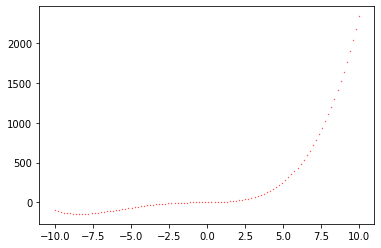

In [4]:
data.plot()

In [5]:
dataloader = DataLoader(data, batch_size=10, shuffle=True)

In [6]:
class MyModel(nn.Module):
    def __init__(self,size):
        super(MyModel, self).__init__()
        self.layer1 = torch.nn.Linear(1,size)
        self.layer2 = torch.nn.Linear(size,1)
        
    def forward(self,x):
        l1 = torch.relu(self.layer1(x))
        return self.layer2(l1)

In [7]:
my_model = MyModel(10000)

In [8]:
optimizer = torch.optim.Adam(my_model.parameters(),lr=0.01)

In [9]:
for t in range(1000):
    for batch_x, batch_y in dataloader:
        optimizer.zero_grad()
        y_pred = my_model(batch_x)
        mse = ((y_pred - batch_y)**2).mean()
        mse.backward()
        optimizer.step()

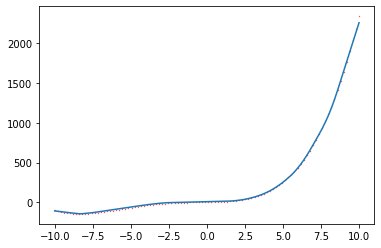

In [10]:
data.plot()
plt.plot(data.x,my_model(data.x).detach().numpy())